In [32]:
import numpy as np
import scipy as sci
import sympy as sy
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from matplotlib import cm

In [2]:
def aproxBilineal(x,y,p):
    it=np.array([0,1])
    sumatorio=0
    coeffs=np.array([[p[0],p[1]],[p[2],p[3]]])
    for i in it:
        for j in it:
            sumatorio+=coeffs[i,j]*x**j*y**i
    return sumatorio

In [3]:
x=sy.Symbol("x",Real=True)
y=sy.Symbol("y",Real=True)
a00=sy.Symbol("a00",Real=True)
a01=sy.Symbol("a01",Real=True)
a10=sy.Symbol("a10",Real=True)
a11=sy.Symbol("a11",Real=True)

In [4]:
b=np.array([a00,a10,a01,a11])
b[3]

a11

In [5]:
eq=aproxBilineal(x,y,b)

In [7]:
position=np.zeros((4,2))
p_verx=(1,-1,-1,1)
p_very=(1,1,-1,-1)
for i in range(len(p_verx)):
    position[i,0]=p_verx[i]
    position[i,1]=p_very[i]
position

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

In [8]:
position[0]

array([1., 1.])

In [9]:
for i in position:
    print(aproxBilineal(i[0],i[1],b))

1.0*a00 + 1.0*a01 + 1.0*a10 + 1.0*a11
1.0*a00 + 1.0*a01 - 1.0*a10 - 1.0*a11
1.0*a00 - 1.0*a01 - 1.0*a10 + 1.0*a11
1.0*a00 - 1.0*a01 + 1.0*a10 - 1.0*a11


In [10]:
A=np.array([[1,1,1,1],[1,-1,1,-1],[1,-1,-1,1],[1,1,-1,-1]])

In [11]:
A

array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1, -1, -1,  1],
       [ 1,  1, -1, -1]])

In [12]:
B=np.array([1,2,0.5,0.3])

In [13]:
B

array([1. , 2. , 0.5, 0.3])

In [14]:
A_inv=np.linalg.inv(A)

In [15]:
A_inv

array([[ 0.25,  0.25,  0.25,  0.25],
       [ 0.25, -0.25, -0.25,  0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [ 0.25, -0.25,  0.25, -0.25]])

In [16]:
b=np.linalg.solve(A,B)
b

array([ 0.95, -0.3 ,  0.55, -0.2 ])

In [22]:
for i in position:
    print(aproxBilineal(i[0],i[1],b))

1.0
2.0
0.49999999999999994
0.2999999999999999


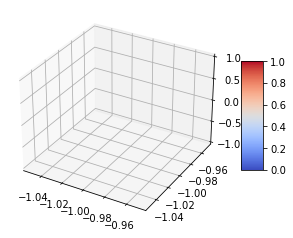

In [94]:
x=np.linspace(-1,1,1000)
y=np.linspace(-1,1,1000)
T=aproxBilineal(x,y,b)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-1, 1, 1000)
Y = np.arange(-1, 1, 1000)
X, Y = np.meshgrid(X, Y)
Z = aproxBilineal(X,Y,b)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [28]:
#Numeral f
T_p=aproxBilineal(0,0.5,b)
T_p

1.225

In [39]:
T_z

array([[0.5       , 0.4997998 , 0.4995996 , ..., 0.3004004 , 0.3002002 ,
        0.3       ],
       [0.5015015 , 0.5013005 , 0.5010995 , ..., 0.3011027 , 0.3009017 ,
        0.3007007 ],
       [0.503003  , 0.5028012 , 0.5025994 , ..., 0.30180501, 0.3016032 ,
        0.3014014 ],
       ...,
       [1.996997  , 1.9959976 , 1.9949982 , ..., 1.00059739, 0.999598  ,
        0.9985986 ],
       [1.9984985 , 1.9974983 , 1.9964981 , ..., 1.0012997 , 1.0002995 ,
        0.9992993 ],
       [2.        , 1.998999  , 1.997998  , ..., 1.002002  , 1.001001  ,
        1.        ]])

In [63]:
theta=np.linspace(0,2*np.pi,200)

In [74]:
def rot(theta,p):
    rot_m=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    p_rots=[]
    for i in p:
        p_rot=np.dot(rot_m,i)
        p_rots.append(p_rot)
    p_arr=np.array(p_rots)
    return p_arr

In [75]:
p_arr=rot(0.25,position)

In [76]:
b=np.array([a00,a10,a01,a11])
for i in p_arr:
    print(aproxBilineal(i[0],i[1],b))

1.0*a00 + 1.21631638096517*a01 + 0.721508462456122*a10 + 0.877582561890373*a11
1.0*a00 + 0.721508462456122*a01 - 1.21631638096517*a10 - 0.877582561890373*a11
1.0*a00 - 1.21631638096517*a01 - 0.721508462456122*a10 + 0.877582561890373*a11
1.0*a00 - 0.721508462456122*a01 + 1.21631638096517*a10 - 0.877582561890373*a11


In [77]:
A_rot=np.array([[1,p_arr[0,1],p_arr[0,0],p_arr[0,0]*p_arr[0,1]],[1,p_arr[1,1],p_arr[1,0],p_arr[1,0]*p_arr[1,1]],[1,p_arr[2,1],p_arr[2,0],p_arr[2,0]*p_arr[2,1]],[1,p_arr[3,1],p_arr[3,0],p_arr[3,0]*p_arr[3,1]]])

In [78]:
A_rot

array([[ 1.        ,  1.21631638,  0.72150846,  0.87758256],
       [ 1.        ,  0.72150846, -1.21631638, -0.87758256],
       [ 1.        , -1.21631638, -0.72150846,  0.87758256],
       [ 1.        , -0.72150846,  1.21631638, -0.87758256]])

In [79]:
b=np.linalg.solve(A_rot,B)
b

array([ 0.95      ,  0.45868064, -0.4267459 , -0.22789879])

In [82]:
T_p=aproxBilineal(0,0.5,b)
T_p

0.7366270479484094

In [90]:
t_list=[]
for i in theta:
    p_arr=rot(i,position)
    b=np.array([a00,a10,a01,a11])
    A_rot=np.array([[1,p_arr[0,1],p_arr[0,0],p_arr[0,0]*p_arr[0,1]],[1,p_arr[1,1],p_arr[1,0],p_arr[1,0]*p_arr[1,1]],[1,p_arr[2,1],p_arr[2,0],p_arr[2,0]*p_arr[2,1]],[1,p_arr[3,1],p_arr[3,0],p_arr[3,0]*p_arr[3,1]]])
    b=np.linalg.solve(A_rot,B)
    T_p=aproxBilineal(0,0.5,b)
    t_list.append(T_p)
t_arr=np.array(t_list)
t_minimo=t_arr.min()
for i in range(len(t_arr)):
    if(t_arr[i]==t_minimo):
        i_minimo=i
angulo_minimo=theta[i_minimo]
angulo_minimo

1.0735090474578188